In [1]:
pip install plotly==5.1.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.io as pio
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

pio.renderers.default = 'iframe'

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


In [3]:
df = pd.read_csv('udemy_courses.csv')
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
df.shape

# 3678 kursumuz var ve bunlara ait 12 feature, 12 ayrı bilgi var.

(3678, 12)

In [5]:
df.info()

# temiz bir data olduğunu görüyoruz. data type larında bizi rahatsız eden data type var mı?
# published_timestamp, datetime tipinde olması daha uygun olur.
# url ile ilgili bir çalışmam olmayacaksa düşürülebilir,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [6]:
df.isnull().sum()

# temiz bir data gibi gözüküyor.

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [7]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [9]:
df['date'] = pd.to_datetime(df['published_timestamp'])

# published_timestamp ı datetime yaparak date adında bir sütun yaptım.

In [10]:
# drop ile düşürdüm

df1 = df.drop(['course_id', 'url', 'published_timestamp'], axis=1).copy()

In [11]:
df1.sample(2)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,date
140,Intro to Financial Modeling,True,105,1077,110,55,Beginner Level,6.0,Business Finance,2016-08-19 20:12:24+00:00
1403,Mobile App Design: From Beginner to Intermediate,True,140,896,21,108,All Levels,10.0,Graphic Design,2017-02-20 17:42:07+00:00


In [12]:
df1.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,156.259108,40.108755,4.094517
std,61.005755,9504.117010,935.452044,50.383346,6.053840
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.000000,4.000000,15.000000,1.000000
50%,45.000000,911.500000,18.000000,25.000000,2.000000
75%,95.000000,2546.000000,67.000000,45.750000,4.500000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000


### describe() bilgilerinin dağılımını görmek istiyorum. histogram plot bunları için uygun

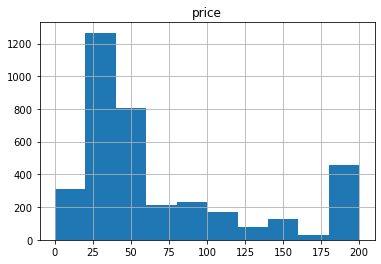

In [13]:
# pandas ile histogram:

df1.hist('price');

<AxesSubplot:xlabel='price', ylabel='Count'>

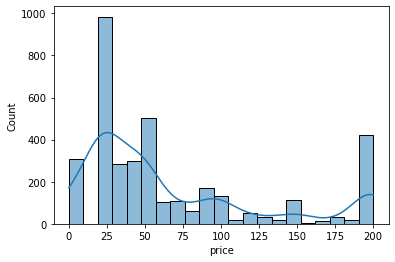

In [14]:
sns.histplot(data=df1, x='price', kde=True)

<AxesSubplot:xlabel='num_subscribers', ylabel='Count'>

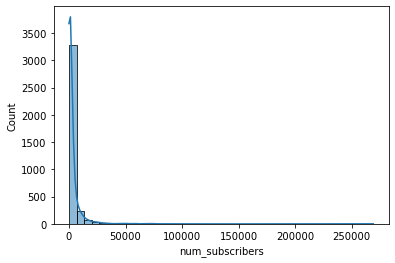

In [15]:
sns.histplot(data=df1, x = "num_subscribers", kde=True, bins=40)

<AxesSubplot:xlabel='num_reviews', ylabel='Count'>

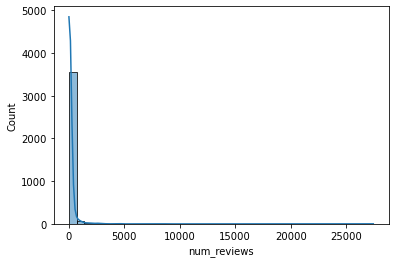

In [16]:
sns.histplot(data=df1, x = "num_reviews", kde=True, bins=40)

<AxesSubplot:xlabel='num_lectures', ylabel='Count'>

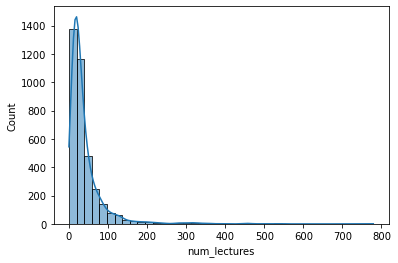

In [17]:
sns.histplot(data=df1, x = "num_lectures", kde=True, bins=40)

<AxesSubplot:xlabel='content_duration', ylabel='Count'>

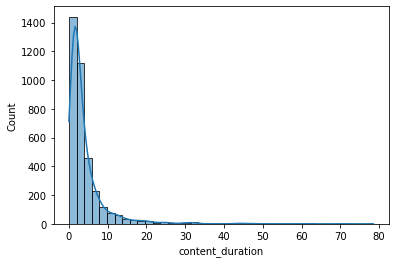

In [19]:
sns.histplot(data=df1, x = "content_duration", kde=True, bins=40)

In [20]:
fig = px.histogram(df1, x = 'price', title = 'Price of UDEMY Courses')

fig.show()

### price'ın boxplot'u 

<AxesSubplot:xlabel='price'>

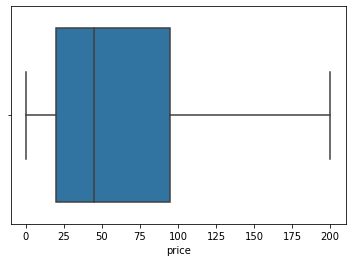

In [21]:
sns.boxplot(data=df1, x = df1.price)

In [22]:
fig = px.box(df1, x='price', hover_data = df[['course_title', 'subject']])
fig.update_traces(quartilemethod = "inclusive")
fig.show()

# fig.update_traces ile başlayan satır olmasa da çalışır ama outlierlar için gerekli bir kod


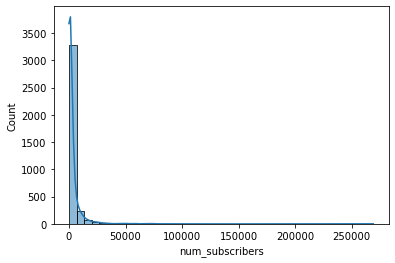

In [23]:
sns.histplot(data = df1, x='num_subscribers', kde=True, bins=40);

In [25]:
fig = px.box(df1, x='num_subscribers', hover_data=df1[['course_title', 'subject']])
fig.update_traces(quartilemethod = "inclusive")
fig.show()

In [26]:
fig = px.box(df1, x='num_reviews', hover_data=df1[['course_title', 'subject']])
fig.update_traces(quartilemethod = "inclusive")
fig.show()

<AxesSubplot:ylabel='Frequency'>

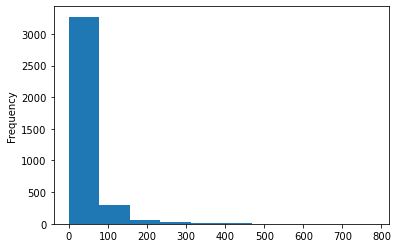

In [27]:
df["num_lectures"].plot(kind="hist")

In [28]:
fig = px.box(df1, x='num_lectures', title='Number of Lectures of UDEMY Courses')

fig.show()

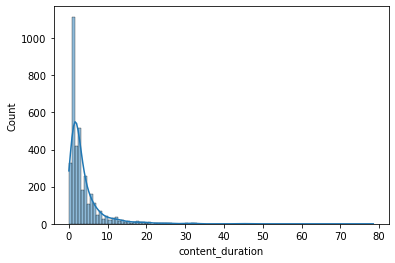

In [29]:
sns.histplot(data = df1, x='content_duration', kde = True, bins = 100);



### "Subject"in dağılımı

In [30]:
df1.subject.value_counts()[:5]

# tercih edilen subject lerin sayısı

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [31]:
df1.subject.value_counts(normalize = True)[:10]

# tercih edilen subject lerin sayısının normalize edilmiş hali.. yani yüzdesi

Web Development        0.326264
Business Finance       0.324905
Musical Instruments    0.184883
Graphic Design         0.163948
Name: subject, dtype: float64

In [32]:
fig = px.histogram(df1, x="subject", title='subject', marginal = 'box')
fig.show()

## correlation matrix incelemesi

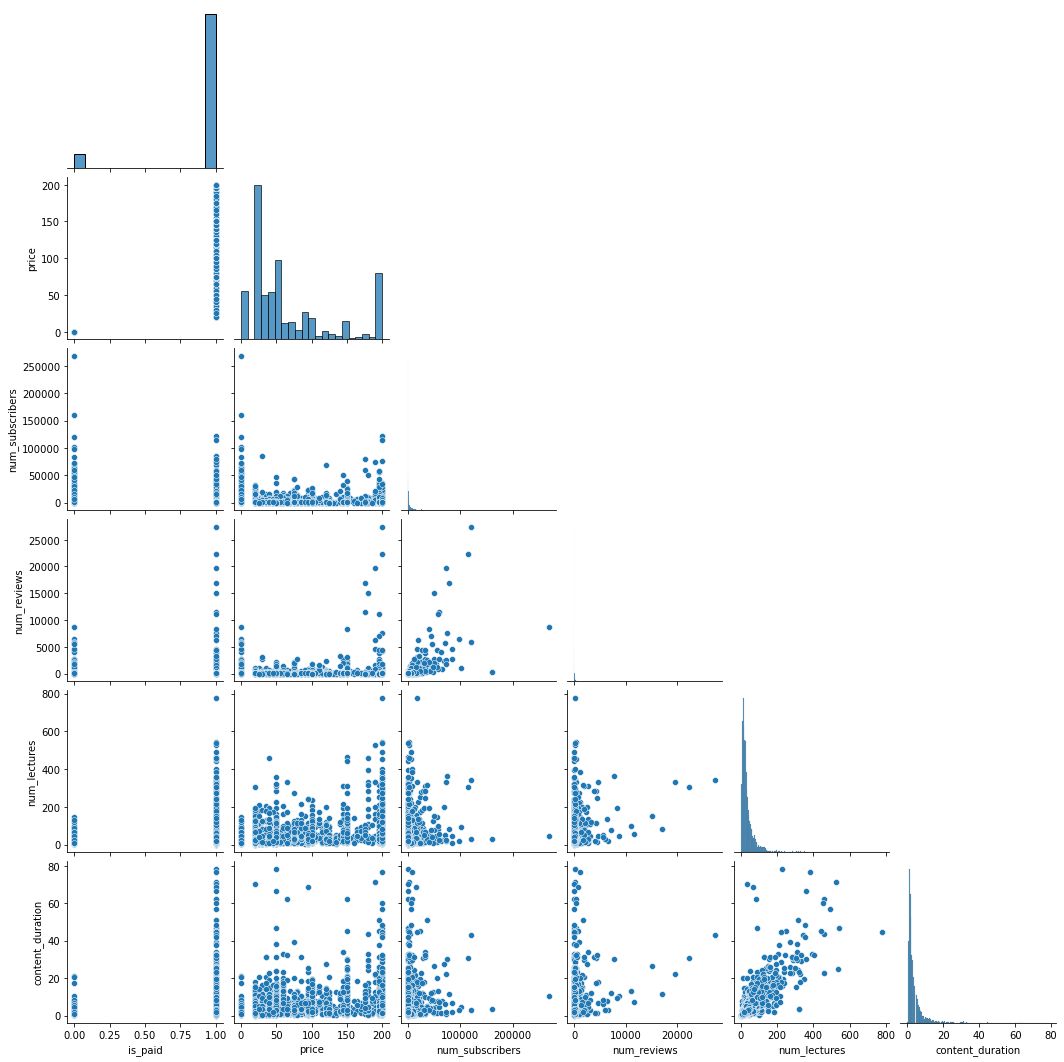

In [35]:
sns.pairplot(df1,corner = True)


In [37]:
df1.corr()

,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417
price,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000


## heat plot

<AxesSubplot:>

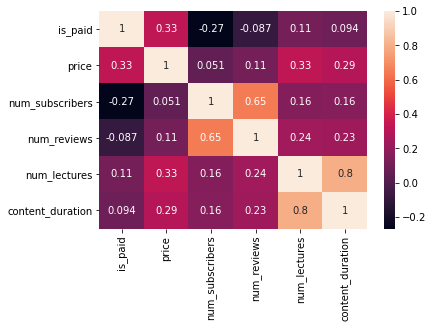

In [38]:

sns.heatmap(df1.corr(), annot=True)

# sonra grafiği büyüt!!

### hangi subject ten ne kadar kurs alınmış yıllara göre dağılımını görelim.

In [39]:
df1.date

0      2017-01-18 20:58:58+00:00
1      2017-03-09 16:34:20+00:00
2      2016-12-19 19:26:30+00:00
3      2017-05-30 20:07:24+00:00
4      2016-12-13 14:57:18+00:00
                  ...           
3673   2016-06-14 17:36:46+00:00
3674   2017-03-10 22:24:30+00:00
3675   2015-12-30 16:41:42+00:00
3676   2016-08-11 19:06:15+00:00
3677   2014-09-28 19:51:11+00:00
Name: date, Length: 3678, dtype: datetime64[ns, UTC]

In [40]:
df1['year'] = df1['date'].dt.year

# bir datetime object olan "date" ten yılları çekip "year" sütununu oluşturduk.

In [41]:
df1.head(2)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,date,year
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,Business Finance,2017-01-18 20:58:58+00:00,2017
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,Business Finance,2017-03-09 16:34:20+00:00,2017


In [42]:
subject_year = df1.groupby('year')['subject'].value_counts()

subject_year

year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         56
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          66
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       349
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       225
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: subject, dtype: int64

In [43]:
df1.groupby('year')['subject'].value_counts().reset_index(level=0)

,year,subject
subject,,
Web Development,2011,5
Web Development,2012,19
Graphic Design,2012,10
Musical Instruments,2012,10
Business Finance,2012,6
Business Finance,2013,84
Web Development,2013,56
Musical Instruments,2013,39
Graphic Design,2013,23


In [44]:
subject_by_year = df1.groupby('year')['subject'].value_counts().reset_index(level=0).rename(columns = {'subject' : 'subject count'})

subject_by_year

,year,subject count
subject,,
Web Development,2011,5
Web Development,2012,19
Graphic Design,2012,10
Musical Instruments,2012,10
Business Finance,2012,6
Business Finance,2013,84
Web Development,2013,56
Musical Instruments,2013,39
Graphic Design,2013,23


In [45]:
px.line(subject_by_year, x='year', y='subject count', color = subject_by_year.index, title='UDEMY Courses By Subject in Each Year')


### ücretli ve ücretsiz olan kursların top15 lerini görelim. ('course_title','year','subject','num_subscribers' başlıklarına göre ama num_subscribers a göre sıralanacak)

In [46]:
df1[['course_title', 'year', 'num_subscribers']][df1["is_paid"] == True]

# df1'in yukardaki 3 columnunu çek ve bunların içinden df1 datasında is_paid == True olanlarını (ücretli kursları) getir. 

,course_title,year,num_subscribers
0,Ultimate Investment Banking Course,2017,2147
1,Complete GST Course & Certification - Grow You...,2017,2792
2,Financial Modeling for Business Analysts and C...,2016,2174
3,Beginner to Pro - Financial Analysis in Excel ...,2017,2451
4,How To Maximize Your Profits Trading Options,2016,1276
...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,2016,1040
3674,How To Design A WordPress Website With No Codi...,2017,306
3675,Learn and Build using Polymer,2015,513
3676,CSS Animations: Create Amazing Effects on Your...,2016,300


In [47]:
df1[['course_title', 'year', 'num_subscribers']][df1["is_paid"] == True].sort_values(by="num_subscribers", ascending = False)[:15]

# num_subscribers'ın azalan değerlerine göre sıralayıp ilk 15'ini getir.(yani en revaçtaki 15 ücretli kursu getirdik)

,course_title,year,num_subscribers
3230,The Web Developer Bootcamp,2015,121584
3232,The Complete Web Developer Course 2.0,2016,114512
2619,Learn Javascript & JQuery From Scratch,2013,84897
3247,JavaScript: Understanding the Weird Parts,2015,79612
1979,Pianoforall - Incredible New Way To Learn Pian...,2014,75499
3204,Angular 4 (formerly Angular 2) - The Complete ...,2016,73783
2701,Become a Web Developer from Scratch,2011,69186
3246,Learn and Understand AngularJS,2014,59361
3251,Learn and Understand NodeJS,2015,58208
2662,The Complete HTML & CSS Course - From Novice T...,2015,57422


In [48]:
# şimdi bu sütunlara subject ve price sütunlarını da ekleyip yorumlayalım

top_15_paid_courses = df1[['course_title', 'year', 'num_subscribers', 'subject', 'price']][df1["is_paid"] == True].sort_values(by="num_subscribers", ascending = False)[:15]
top_15_paid_courses

,course_title,year,num_subscribers,subject,price
3230,The Web Developer Bootcamp,2015,121584,Web Development,200
3232,The Complete Web Developer Course 2.0,2016,114512,Web Development,200
2619,Learn Javascript & JQuery From Scratch,2013,84897,Web Development,30
3247,JavaScript: Understanding the Weird Parts,2015,79612,Web Development,175
1979,Pianoforall - Incredible New Way To Learn Pian...,2014,75499,Musical Instruments,200
3204,Angular 4 (formerly Angular 2) - The Complete ...,2016,73783,Web Development,190
2701,Become a Web Developer from Scratch,2011,69186,Web Development,120
3246,Learn and Understand AngularJS,2014,59361,Web Development,175
3251,Learn and Understand NodeJS,2015,58208,Web Development,195
2662,The Complete HTML & CSS Course - From Novice T...,2015,57422,Web Development,195


In [49]:
# alternatif kod: 
top_15_paid_courses = df1[df1['price'] != 0][['course_title', 'year', 'num_subscribers', 'subject', 'price']].sort_values(by='num_subscribers', ascending = False)[:15]

top_15_paid_courses 

,course_title,year,num_subscribers,subject,price
3230,The Web Developer Bootcamp,2015,121584,Web Development,200
3232,The Complete Web Developer Course 2.0,2016,114512,Web Development,200
2619,Learn Javascript & JQuery From Scratch,2013,84897,Web Development,30
3247,JavaScript: Understanding the Weird Parts,2015,79612,Web Development,175
1979,Pianoforall - Incredible New Way To Learn Pian...,2014,75499,Musical Instruments,200
3204,Angular 4 (formerly Angular 2) - The Complete ...,2016,73783,Web Development,190
2701,Become a Web Developer from Scratch,2011,69186,Web Development,120
3246,Learn and Understand AngularJS,2014,59361,Web Development,175
3251,Learn and Understand NodeJS,2015,58208,Web Development,195
2662,The Complete HTML & CSS Course - From Novice T...,2015,57422,Web Development,195


In [50]:
fig=px.bar(top_15_paid_courses, y='num_subscribers', x = 'course_title', hover_data = top_15_paid_courses[['year', 'subject', 'price']])
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [51]:
top_15_free_courses = df1[df1['price'] == 0][['course_title', 'year', 'num_subscribers', 'subject']].sort_values(by='num_subscribers', ascending = False)[:15]

top_15_free_courses

,course_title,year,num_subscribers,subject
2827,Learn HTML5 Programming From Scratch,2013,268923,Web Development
3032,Coding for Entrepreneurs Basic,2013,161029,Web Development
2783,Build Your First Website in 1 Week with HTML5 ...,2014,120291,Web Development
1896,Free Beginner Electric Guitar Lessons,2012,101154,Musical Instruments
2589,Web Design for Web Developers: Build Beautiful...,2015,98867,Web Development
3289,Practical PHP: Master the Basics and Code Dyna...,2014,83737,Web Development
3665,Beginner Photoshop to HTML5 and CSS3,2012,73110,Web Development
2782,Web Development By Doing: HTML / CSS From Scratch,2013,72932,Web Development
3325,HTML and CSS for Beginners - Build a Website &...,2015,70773,Web Development
492,Bitcoin or How I Learned to Stop Worrying and ...,2013,65576,Business Finance
